In [52]:
import torch
import matplotlib.pyplot as plt

from m2_utilities.load_data import load_trajectories
from m2_utilities.preprocessor import scale, get_tokenizer, batch_stringify, batch_destringify

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
trajectories = load_trajectories("data/lotka_volterra_data.h5")

### Making Some Visualisations

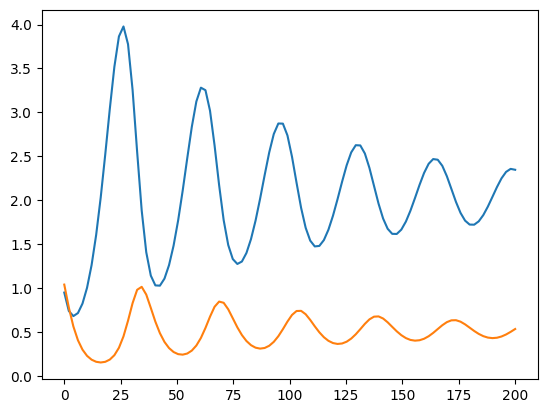

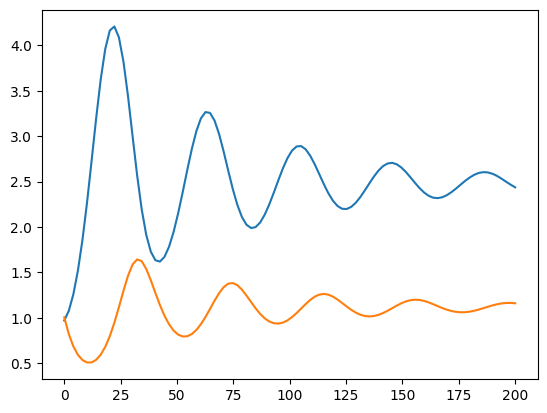

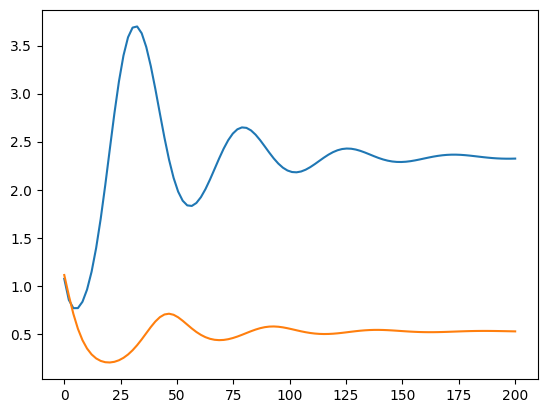

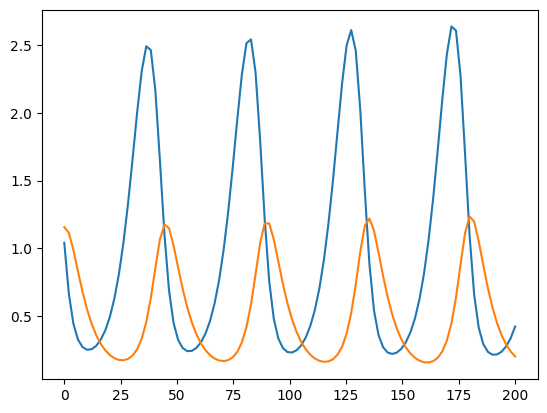

In [54]:
system_ids = [0, 1, 2, 3]

time_points = torch.linspace(0, 200, 100)
for system_id in system_ids:
    predators = trajectories[system_id, :, 0]
    prey = trajectories[system_id, :, 1]

    plt.plot(time_points, predators)
    plt.plot(time_points, prey)
    plt.show()

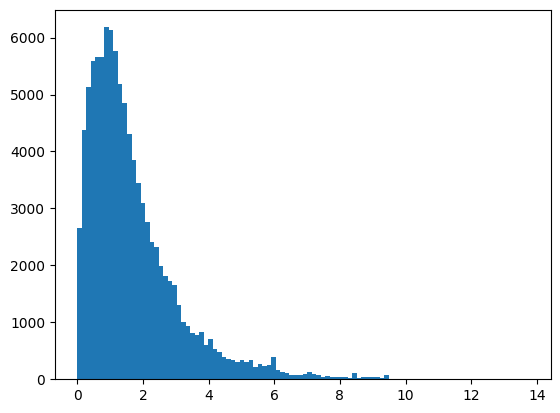

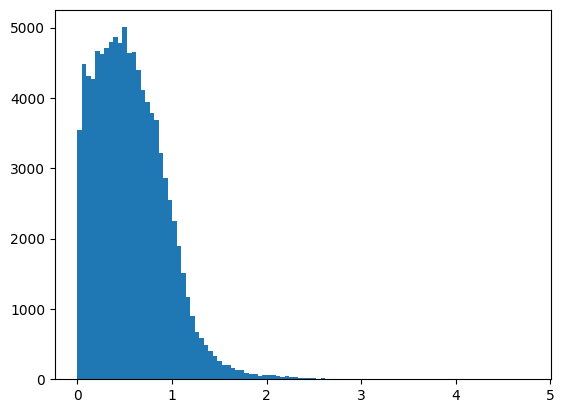

In [55]:
plt.hist(trajectories[:, :, 0].reshape(-1), bins=100)
plt.show()

plt.hist(trajectories[:, :, 1].reshape(-1), bins=100)
plt.show()

### Some Metrics

In [57]:
# Unscaled
print(f"Max Predators: {torch.max(trajectories[:, :, 0])}")
print(f"Min Predators: {torch.min(trajectories[:, :, 0])}")
print(f"Max Prey: {torch.max(trajectories[:, :, 1])}")
print(f"Min Prey: {torch.min(trajectories[:, :, 1])}")

Max Predators: 13.740113258361816
Min Predators: 0.002077328274026513
Max Prey: 4.768490314483643
Min Prey: 3.735509380931035e-05


### Scaling

In [76]:
scaled_trajectories, alpha = scale(trajectories)
print(alpha)
print(scaled_trajectories.shape)

1.387890228117355
torch.Size([1000, 100, 2])


In [79]:
# Scaled
print(f"Max Predators: {torch.max(scaled_trajectories[:, :, 0])}")
print(f"Min Predators: {torch.min(scaled_trajectories[:, :, 0])}")
print(f"Max Prey: {torch.max(scaled_trajectories[:, :, 1])}")
print(f"Min Prey: {torch.min(scaled_trajectories[:, :, 1])}")

Max Predators: 9.899999618530273
Min Predators: 0.0014967526076361537
Max Prey: 3.4357833862304688
Min Prey: 2.6915020498563536e-05


### Stringifying and Tokenizing the Trajectories

In [80]:
# Stringify
DECIMALS = 3
texts = batch_stringify(scaled_trajectories, DECIMALS)

In [81]:
# Tokenize
tokenizer = get_tokenizer()
all_token_ids = tokenizer(texts, return_tensors="pt", add_special_tokens=False)["input_ids"]

### Decoding Tokens and Destringifying to Restore Original Trajectories

In [82]:
# Decode
restored_texts = tokenizer.batch_decode(all_token_ids, return_tensors="pt", add_special_tokens=False)

In [83]:
# Destringify
restored_trajectories = batch_destringify(restored_texts)

print("Restored:")
print(restored_trajectories[0, :5])
print("")
print("Original:")
print(scaled_trajectories[0, :5])

Restored:
tensor([[0.6840, 0.7500],
        [0.5340, 0.5620],
        [0.4920, 0.4070],
        [0.5160, 0.2940],
        [0.5940, 0.2160]])

Original:
tensor([[0.6844, 0.7498],
        [0.5336, 0.5617],
        [0.4916, 0.4067],
        [0.5164, 0.2937],
        [0.5941, 0.2164]])
